In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (15,10)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#### Importing Datasets

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv"); train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Exploratory Data Analysis

In [3]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [4]:
#checking for null values in training dataset
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#checking for null values in test dataset
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#checking the number of peoplr that died and those that survived
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

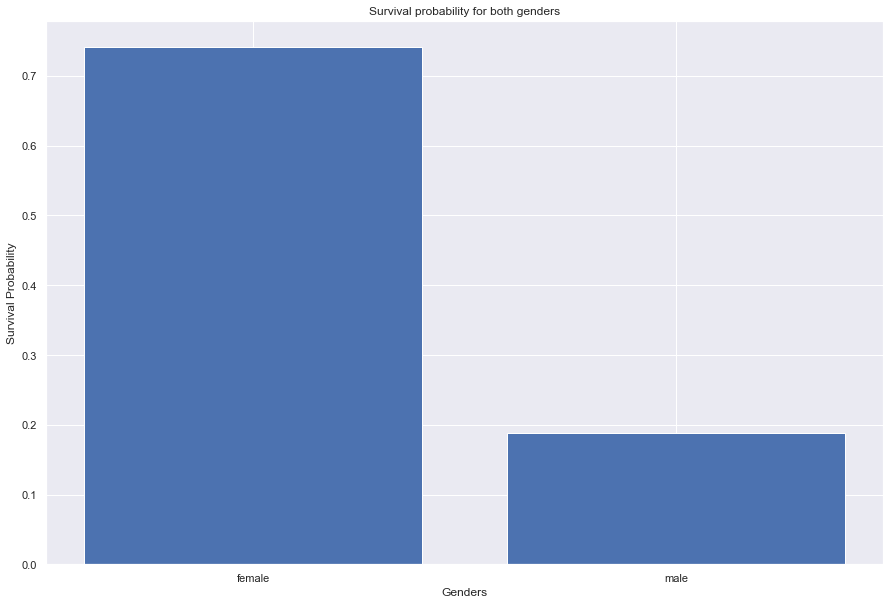

In [7]:
#looking at survival rates for each gender
k = train_data[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()
plt.bar(k.Sex,k.Survived)
plt.title("Survival probability for both genders")
plt.xlabel("Genders")
plt.ylabel("Survival Probability")
plt.show()

In [8]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [9]:
#looking at survival rates for each paasenger class
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Data Manipulation

In [11]:
#dropping some columns
drop = ["PassengerId", "Name", "Cabin", "Ticket"]
train_data.drop(drop, inplace=True, axis=1)
test_data.drop(drop, inplace=True, axis=1)
#train_data

In [12]:
#filling null value in age with mean
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
#train_data

In [13]:
# create a list of our conditions
conditions = [
    (train_data['Age'] < 13),
    (train_data['Age'] >= 13) & (train_data['Age'] < 19),
    (train_data['Age'] >= 19) & (train_data['Age'] < 26),
    (train_data['Age'] >= 26) & (train_data['Age'] < 60),
    (train_data['Age'] >= 60)
    ]

# create a list of the values we want to assign for each condition
values = ['Children', 'Adolescence', 'Youth', 'Adult', 'Seniors']

# create a new column and use np.select to assign values to it using our lists as arguments
train_data['Age_group'] = np.select(conditions, values)

In [14]:
# create a list of our conditions
conditions = [
    (test_data['Age'] < 13),
    (test_data['Age'] >= 13) & (test_data['Age'] < 19),
    (test_data['Age'] >= 19) & (test_data['Age'] < 26),
    (test_data['Age'] >= 26) & (test_data['Age'] < 60),
    (test_data['Age'] >= 60)
    ]

# create a list of the values we want to assign for each condition
values = ['Children', 'Adolescence', 'Youth', 'Adult', 'Seniors']

# create a new column and use np.select to assign values to it using our lists as arguments
test_data['Age_group'] = np.select(conditions, values)

In [15]:
#filling null value in Embarked with mode
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

In [16]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         1
Embarked     0
Age_group    0
dtype: int64

In [17]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
h = test_data[test_data.isnull().any(axis=1)]
h

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
152,3,male,60.5,0,0,NaN,S,Seniors


In [19]:
pclass3_mean_fare = test_data["Fare"][test_data["Pclass"]==3].mean()
pclass3_mean_fare

12.459677880184334

In [20]:
test_data["Fare"] = test_data["Fare"].fillna(pclass3_mean_fare)
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,3,male,34.50000,0,0,7.8292,Q,Adult
1,3,female,47.00000,1,0,7.0000,S,Adult
2,2,male,62.00000,0,0,9.6875,Q,Seniors
3,3,male,27.00000,0,0,8.6625,S,Adult
4,3,female,22.00000,1,1,12.2875,S,Youth
...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,Adult
414,1,female,39.00000,0,0,108.9000,C,Adult
415,3,male,38.50000,0,0,7.2500,S,Adult
416,3,male,30.27259,0,0,8.0500,S,Adult


In [21]:
test_data.loc[152]

Pclass               3
Sex               male
Age               60.5
SibSp                0
Parch                0
Fare         12.459678
Embarked             S
Age_group      Seniors
Name: 152, dtype: object

In [22]:
train_data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Age_group    0
dtype: int64

#### Categorical to Numerical conversion

In [23]:
#changing categorical variable in sex to numerical
train_data['Sex'] = pd.get_dummies(train_data['Sex'])
test_data['Sex'] = pd.get_dummies(test_data['Sex'])

train_data = pd.get_dummies(train_data, columns=['Embarked',"Age_group"])
test_data = pd.get_dummies(test_data, columns=['Embarked',"Age_group"])

# train_data['Age_group'] = pd.get_dummies(train_data['Age_group'])
# test_data['Age_group'] = pd.get_dummies(test_data['Age_group'])

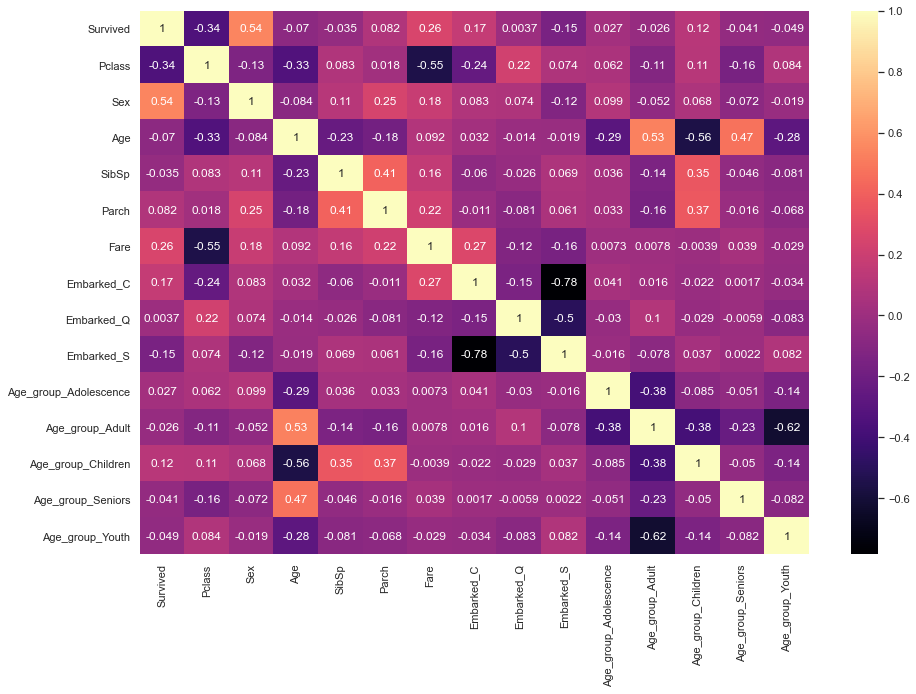

In [24]:
# plotting correlation heatmap
plot_heatmap = sns.heatmap(train_data.corr(), cmap="magma", annot=True)
plt.show()

In [25]:
#dropping some columns
drop = ["Age", "Embarked_Q", "Age_group_Adult"]
train_data.drop(drop, inplace=True, axis=1)
test_data.drop(drop, inplace=True, axis=1)

In [26]:
train_data

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_S,Age_group_Adolescence,Age_group_Children,Age_group_Seniors,Age_group_Youth
0,0,3,0,1,0,7.2500,0,1,0,0,0,1
1,1,1,1,1,0,71.2833,1,0,0,0,0,0
2,1,3,1,0,0,7.9250,0,1,0,0,0,0
3,1,1,1,1,0,53.1000,0,1,0,0,0,0
4,0,3,0,0,0,8.0500,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,13.0000,0,1,0,0,0,0
887,1,1,1,0,0,30.0000,0,1,0,0,0,1
888,0,3,1,1,2,23.4500,0,1,0,0,0,0
889,1,1,0,0,0,30.0000,1,0,0,0,0,0


In [27]:
#separating the predictors and label
X = train_data.drop('Survived', axis = 1)
y = train_data['Survived']

#splitting the dataset with 70% training and 30% test
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [28]:
#reducing the data to a reasonable range to reduce potential for bias because fare is significantly higher than the rest of the features
#scaling the data to unit variance
scaler = StandardScaler() 

#computes mean and stdev and then uses this to transorm data
X = scaler.fit_transform(X) 
test_data = scaler.transform(test_data)

#### Modeling and Prediction

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       549
           1       0.93      0.91      0.92       342

    accuracy                           0.94       891
   macro avg       0.94      0.93      0.94       891
weighted avg       0.94      0.94      0.94       891

Accuracy score is: 0.9393939393939394


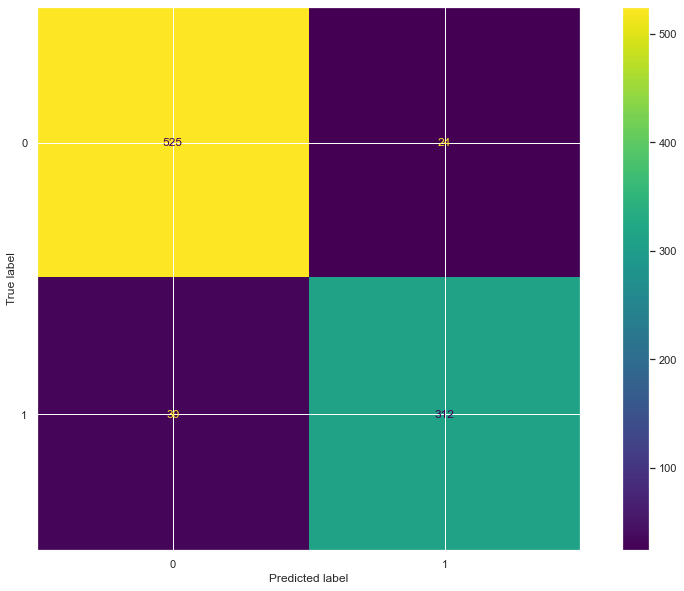

In [29]:
#Using Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X,y)
rfc_prediction = rf_classifier.predict(X)

#printing the classification report
print(classification_report(y,rfc_prediction))
print(f"Accuracy score is: {accuracy_score(rfc_prediction,y)}")
#showing relevant visualization
plot_confusion_matrix(rf_classifier, X, y)  
plt.show()

In [30]:
#carrying out cross validation with random forest
fold_scores = cross_validate(rf_classifier, X, y, cv=4, scoring=['precision','recall','f1','accuracy'])
#print(fold_scores)
#getting the scores for each of the metrics by finding the mean of the scores
precision_score = np.mean(fold_scores["test_precision"])
recall_score = np.mean(fold_scores["test_recall"])
f1_score = np.mean(fold_scores["test_f1"])
acc_score = np.mean(fold_scores["test_accuracy"])

#printing the scores
print(f"The precision score with Random Forest and cv=4 is: {precision_score}")
print(f"The recall score with Random Forest and cv=4 is: {recall_score}")
print(f"The F1 score with Random Forest and cv=4 is: {f1_score}")
print(f"The Accuracy score with Random Forest and cv=4 is: {acc_score}")

The precision score with Random Forest and cv=10 is: 0.7625886066082204
The recall score with Random Forest and cv=10 is: 0.725
The F1 score with Random Forest and cv=10 is: 0.7430325447391183
The Accuracy score with Random Forest and cv=10 is: 0.8080939684078697


The optimal number of trees is 120 with a minimum MSE score of: 0.18741667676645254


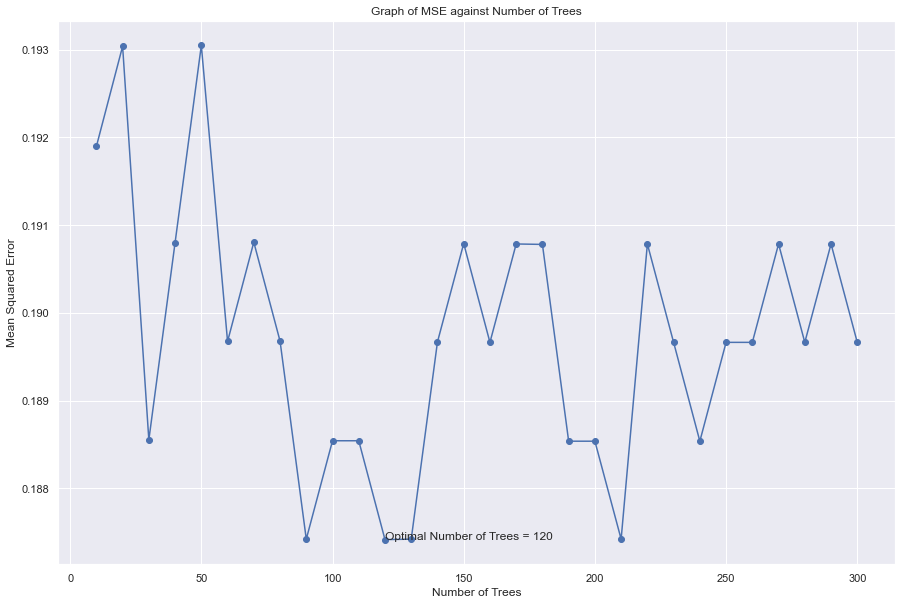

In [31]:
num_tree_list = list(range(10, 301, 10))
scores =[]
for i in num_tree_list:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=23)
    rf_classifier.fit(X, y)
    cv_scores = cross_validate(rf_classifier, X, y, cv=4, scoring = 'neg_mean_squared_error')
    cv_scores = np.mean(cv_scores['test_score'])
    scores.append(abs(cv_scores))

#getting the best performing tree
min_index = scores.index(min(scores))
optimal_tree = num_tree_list[min_index]
#best_tree

#plotting the graph
plt.text(optimal_tree, min(scores), "Optimal Number of Trees = 120")
plt.plot(num_tree_list, scores, "bo-")
plt.ylabel("Mean Squared Error")
plt.xlabel("Number of Trees")
plt.title("Graph of MSE against Number of Trees")
print(f"The optimal number of trees is {optimal_tree} with a minimum MSE score of: {min(scores)}")
plt.show()

In [32]:
#defining the search space for the algorithms
hyperparams={'Random Forest':
                 {'model':RandomForestClassifier(),
                  'params':{
                    'n_estimators': list(range(20, 201, 20)),
                    'max_depth' : list(range(2, 51, 10)),
                    'criterion': ["gini", "entropy"],
                    'max_leaf_nodes': list(range(2, 51, 10)),
                    'bootstrap':[True,False],
                    'ccp_alpha': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005]
                    }
                }
            }

In [33]:
accuracy_values=[]
# loop=1
# keys=hyperparams.keys()
# print(keys)
# print(hyperparams['KNN'])
for key in hyperparams.keys():
    g_search=GridSearchCV(hyperparams[key]['model'],hyperparams[key]['params'],
                          cv=4,return_train_score=True,verbose=1)
    g_search.fit(X,y)
    #print(loop)
    accuracy_values.append({'model':key,
                            'best_score':g_search.best_score_,
                            'best_params':g_search.best_params_
                           })
#     loop+=1

Fitting 4 folds for each of 6000 candidates, totalling 24000 fits


In [35]:
accuracy_values

[{'model': 'Random Forest',
  'best_score': 0.8395093524017291,
  'best_params': {'bootstrap': False,
   'ccp_alpha': 0.004,
   'criterion': 'entropy',
   'max_depth': 12,
   'max_leaf_nodes': 32,
   'n_estimators': 20}}]

In [36]:
accuracy_table=pd.DataFrame(accuracy_values,columns=['model','best_params','best_score'])

accuracy_table

,model,best_params,best_score
0,Random Forest,"{'bootstrap': False, 'ccp_alpha': 0.004, 'crit...",0.839509


In [42]:
rf_classifier = RandomForestClassifier(random_state=3, n_estimators=20, bootstrap=False, criterion='entropy', ccp_alpha=0.004, max_depth=12, max_leaf_nodes=32)
rf_classifier.fit(X,y)
cv_scores = cross_validate(rf_classifier, X, y, cv=4, scoring = 'accuracy')
cv_scores = np.mean(cv_scores['test_score'])
print(f"Score is: {abs(cv_scores)}")

Score is: 0.8249303114773966


In [43]:
prediction = rf_classifier.predict(test_data)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [44]:
test_data2 = pd.read_csv("test.csv")

In [45]:
output = pd.DataFrame({'PassengerId': test_data2["PassengerId"], 'Survived': prediction})
output.to_csv('powoade_submission4.csv', index=False)